In [1]:
# Step 1 : Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

# Ignore all warnings
warnings.filterwarnings("ignore")

# Display settings
pd.set_option('display.max_columns', None)
sns.set_style("whitegrid")

In [2]:
# Load dataset
df = pd.read_csv(r"C:\Users\Admin\Downloads\Laptop Data (1).csv")

# Show first 5 rows
df.head()

,Unnamed: 0,Name,Brand,Price,Rating,Processor_brand,Processor_gen,Core_per_processor,Energy_Efficient_Units,RAM_GB,RAM_type,Storage_capacity_GB,Storage_type,Graphics_brand,Display_size_inches,Horizontal_pixel,Vertical_pixel,Touch_screen,Operating_system
0,0,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,HP,50399,4.30,AMD,5.0,6.0,0,8,DDR4,512,SSD,AMD,15.6,1920,1080,True,Windows 11 OS
1,1,Lenovo V15 G4 ‎82YU00W7IN Laptop (AMD Ryzen 3 ...,Lenovo,26690,4.45,AMD,7.0,4.0,0,8,LPDDR5,512,SSD,AMD,15.6,1920,1080,False,Windows 11 OS
2,2,HP 15s-fq5007TU Laptop (12th Gen Core i3/ 8GB/...,HP,37012,4.65,Intel,12.0,6.0,0,8,DDR4,512,SSD,Intel,15.6,1920,1080,False,Windows 11 OS
3,3,Samsung Galaxy Book2 Pro 13 Laptop (12th Gen C...,Samsung,69990,4.75,Intel,12.0,12.0,0,16,LPDDR5,512,SSD,Intel,13.3,1080,1920,False,Windows 11 OS
4,4,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,Tecno,23990,4.25,Intel,11.0,2.0,0,8,LPDDR4,512,SSD,Intel,15.6,1920,1080,False,Windows 11 OS


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              1020 non-null   int64  
 1   Name                    1020 non-null   object 
 2   Brand                   1020 non-null   object 
 3   Price                   1020 non-null   int64  
 4   Rating                  1020 non-null   float64
 5   Processor_brand         1020 non-null   object 
 6   Processor_gen           891 non-null    float64
 7   Core_per_processor      1008 non-null   float64
 8   Energy_Efficient_Units  1020 non-null   int64  
 9   RAM_GB                  1020 non-null   int64  
 10  RAM_type                998 non-null    object 
 11  Storage_capacity_GB     1020 non-null   int64  
 12  Storage_type            1020 non-null   object 
 13  Graphics_brand          1018 non-null   object 
 14  Display_size_inches     1020 non-null   

In [4]:
df.isnull().sum()

Unnamed: 0                  0
Name                        0
Brand                       0
Price                       0
Rating                      0
Processor_brand             0
Processor_gen             129
Core_per_processor         12
Energy_Efficient_Units      0
RAM_GB                      0
RAM_type                   22
Storage_capacity_GB         0
Storage_type                0
Graphics_brand              2
Display_size_inches         0
Horizontal_pixel            0
Vertical_pixel              0
Touch_screen                0
Operating_system            0
dtype: int64

In [5]:
# Drop unnecessary columns
df.drop(columns=["Unnamed: 0", "Name", "Rating"], inplace = True)

In [6]:
# Fill missing numeric values with median
median_cols = ["Processor_gen", "Core_per_processor"]
for col in median_cols:
    df[col] = df[col].fillna(df[col].median())

In [7]:
# Fill missing categorical values with mode
mode_cols= ["RAM_type","Graphics_brand"]
for col in mode_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [8]:
# Convert Touch_screen from True/False to 1/0
df["Touch_screen"] = df["Touch_screen"].astype(int)

In [9]:
# Feature Engineering -> Screen Resolution & PPI
df["Resolution"] = df["Horizontal_pixel"].astype(str) + "x" + df["Vertical_pixel"].astype(str)
df["Screen_Area"] = (df["Horizontal_pixel"] * df["Vertical_pixel"])/ 1e6  # megapixels

In [10]:
# CPU Catergory (Intel/AMD generations -> Basic/Good/Best)
df["CPU_Level"] = df["Processor_gen"].apply(
    lambda x: "Basic" if x <= 6 else ("Good" if x <= 10 else "Strong")
)

In [11]:
# Drop columns that are no longer needed
df.drop(columns=["Horizontal_pixel", "Vertical_pixel"], inplace=True)

In [12]:
# Data has cleaned sucessesful
df.head()

,Brand,Price,Processor_brand,Processor_gen,Core_per_processor,Energy_Efficient_Units,RAM_GB,RAM_type,Storage_capacity_GB,Storage_type,Graphics_brand,Display_size_inches,Touch_screen,Operating_system,Resolution,Screen_Area,CPU_Level
0,HP,50399,AMD,5.0,6.0,0,8,DDR4,512,SSD,AMD,15.6,1,Windows 11 OS,1920x1080,2.0736,Basic
1,Lenovo,26690,AMD,7.0,4.0,0,8,LPDDR5,512,SSD,AMD,15.6,0,Windows 11 OS,1920x1080,2.0736,Good
2,HP,37012,Intel,12.0,6.0,0,8,DDR4,512,SSD,Intel,15.6,0,Windows 11 OS,1920x1080,2.0736,Strong
3,Samsung,69990,Intel,12.0,12.0,0,16,LPDDR5,512,SSD,Intel,13.3,0,Windows 11 OS,1080x1920,2.0736,Strong
4,Tecno,23990,Intel,11.0,2.0,0,8,LPDDR4,512,SSD,Intel,15.6,0,Windows 11 OS,1920x1080,2.0736,Strong


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Brand                   1020 non-null   object 
 1   Price                   1020 non-null   int64  
 2   Processor_brand         1020 non-null   object 
 3   Processor_gen           1020 non-null   float64
 4   Core_per_processor      1020 non-null   float64
 5   Energy_Efficient_Units  1020 non-null   int64  
 6   RAM_GB                  1020 non-null   int64  
 7   RAM_type                1020 non-null   object 
 8   Storage_capacity_GB     1020 non-null   int64  
 9   Storage_type            1020 non-null   object 
 10  Graphics_brand          1020 non-null   object 
 11  Display_size_inches     1020 non-null   float64
 12  Touch_screen            1020 non-null   int64  
 13  Operating_system        1020 non-null   object 
 14  Resolution              1020 non-null   

In [14]:
# Seperate Features & Target
x = df.drop(columns=["Price"])
y = df["Price"]

In [15]:
# Categorical & Numerical columns
cat_cols = x.select_dtypes(include=["object"]).columns.tolist()
num_cols = x.select_dtypes(exclude=["object"]).columns.tolist()

In [16]:
print("Categorical Columns;", cat_cols)
print("Numerical Columns;", num_cols)

Categorical Columns; ['Brand', 'Processor_brand', 'RAM_type', 'Storage_type', 'Graphics_brand', 'Operating_system', 'Resolution', 'CPU_Level']
Numerical Columns; ['Processor_gen', 'Core_per_processor', 'Energy_Efficient_Units', 'RAM_GB', 'Storage_capacity_GB', 'Display_size_inches', 'Touch_screen', 'Screen_Area']


In [17]:
# Preprocessing Pipelines
preprocessor = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
    ("num", StandardScaler(), num_cols)
])

In [18]:
# Train-Test Split 
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size = 0.2, random_state=42
)

In [19]:
print("X_train shape:", x_train.shape)
print("X_test shape:", x_test.shape)

X_train shape: (816, 16)
X_test shape: (204, 16)


In [20]:
# Build pipeline: preprocessing + model
model = Pipeline([
    ("preprocess", preprocessor),
    ("rf", RandomForestRegressor(n_estimators=200, random_state=42))
])

In [21]:
# Train the model
model.fit(x_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Brand', 'Processor_brand',
                                                   'RAM_type', 'Storage_type',
                                                   'Graphics_brand',
                                                   'Operating_system',
                                                   'Resolution', 'CPU_Level']),
                                                 ('num', StandardScaler(),
                                                  ['Processor_gen',
                                                   'Core_per_processor',
                                                   'Energy_Efficient_Units',
                                                   'RAM_GB',
                                                   'Storage_capacity_GB',
                                                   'Display_size_inches',
                                                   'Touch_screen',
                                                   'Screen_Area'])])),
                ('rf',
                 RandomForestRegressor(n_estimators=200, random_state=42))])

In [22]:
# Predict
y_pred = model.predict(x_test)

In [23]:
# Evaluation
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [24]:
print("Mean absolute error(MAE):", mae)
print("R2 Score:", r2)

Mean absolute error(MAE): 13269.308317908606
R2 Score: 0.8275981214869252


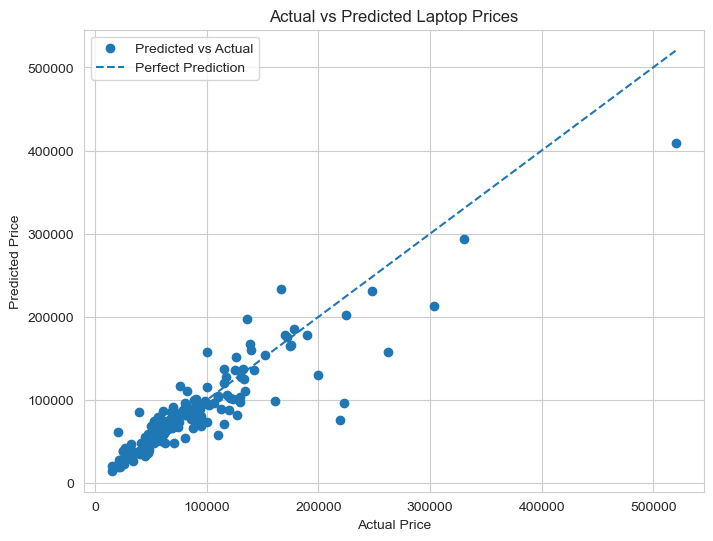

In [25]:
plt.figure(figsize=(8,6))

# Scatter plot for actual vs predicted values
plt.scatter(y_test, y_pred, marker='o',label="Predicted vs Actual")

# Perfect prediction reference 
line_start = min(y_test.min(), y_pred.min())
line_end = max(y_test.max(), y_pred.max())
plt.plot([line_start, line_end],
        [line_start, line_end],
        linestyle='--',
        label='Perfect Prediction')

plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Laptop Prices")
plt.legend()
plt.grid(True)
plt.show()

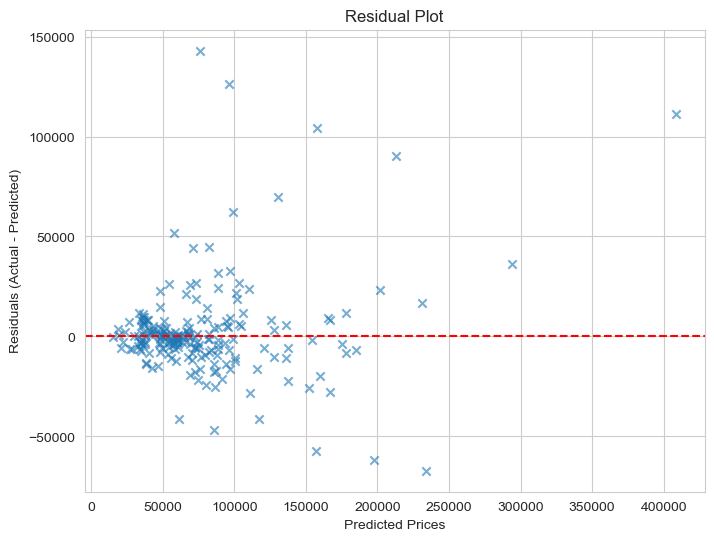

In [34]:
residuals = y_test - y_pred

plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuals, alpha=0.6, marker='x')
plt.axhline(0, color='red', linestyle='--')

plt.xlabel("Predicted Prices")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot")
plt.grid(True)
plt.show()

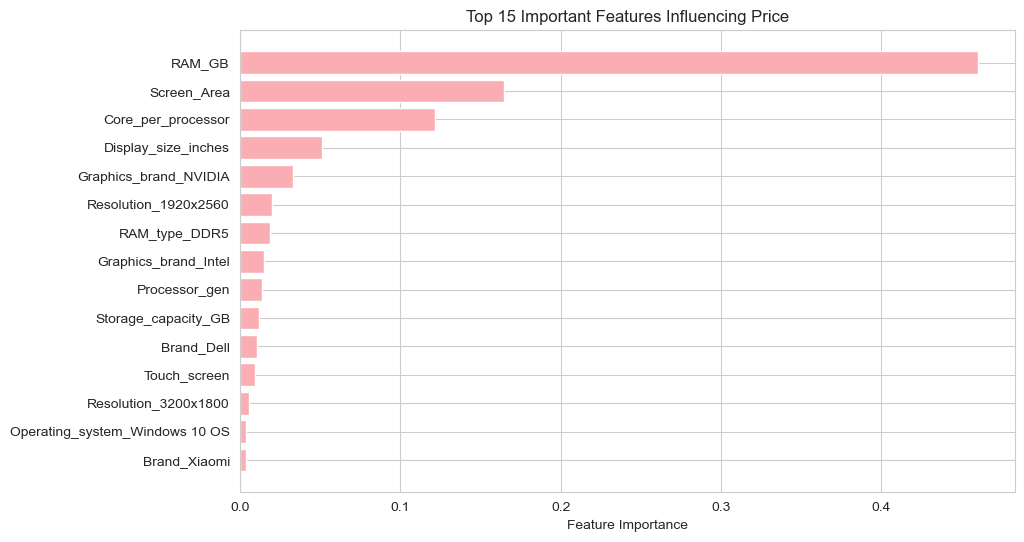

In [27]:
# Extract model and transformer
rf = model.named_steps['rf']
preprocess = model.named_steps['preprocess']

# Get one-hot encoded feature names
ohe = preprocess.named_transformers_['cat']
ohe_features = ohe.get_feature_names_out(cat_cols)

# Full feature set (OHE categorical + original numerical)
all_features = np.concatenate([ohe_features, num_cols])

# Get importances from RF model
importances = rf.feature_importances_
indices = np.argsort(importances)[-15:]  # Top 15 important features

# Plot
plt.figure(figsize=(10,6))
plt.barh(range(len(indices)), importances[indices], color="#fbadb4")
plt.yticks(range(len(indices)), all_features[indices])
plt.xlabel("Feature Importance")
plt.title("Top 15 Important Features Influencing Price")
plt.show()

In [28]:
# Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Model Evaluation Results:")
print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R² Score : {r2:.4f}")

# Save Model for Deployment
joblib.dump(model, "laptop_price_model.pkl") #Model saved as laptop_price_model.pkl

Model Evaluation Results:
MAE  : 13269.31
RMSE : 24705.63
R² Score : 0.8276


['laptop_price_model.pkl']

In [30]:
sample = x_test.sample(5, random_state=42)
actual = y_test.loc[sample.index]
predicted = model.predict(sample)

comparison = pd.DataFrame({
    'Actual Price' : actual,
    'Predicted Price' : predicted
})

print("Sample Predictions vs Actual:")
print(comparison)

Sample Predictions vs Actual:
     Actual Price  Predicted Price
925         48990     54180.860833
411         53138     50542.724167
843        101990     94191.488333
662        218990     76088.096667
547         29990     29923.198845


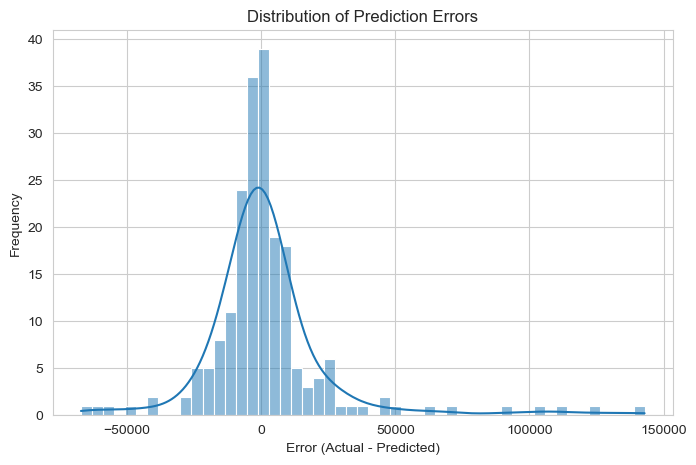

In [31]:
#Prediction Error Distribution
errors = y_test - y_pred

plt.figure(figsize=(8,5))
sns.histplot(errors, kde=True)
plt.title("Distribution of Prediction Errors")
plt.xlabel("Error (Actual - Predicted)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

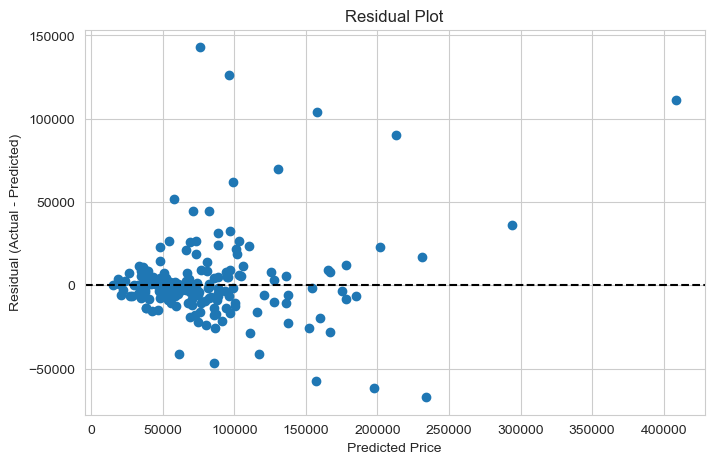

In [32]:
plt.figure(figsize=(8,5))
plt.scatter(y_pred, errors)
plt.axhline(0, linestyle='--', color='black')
plt.xlabel("Predicted Price")
plt.ylabel("Residual (Actual - Predicted)")
plt.title("Residual Plot")
plt.grid(True)
plt.show()

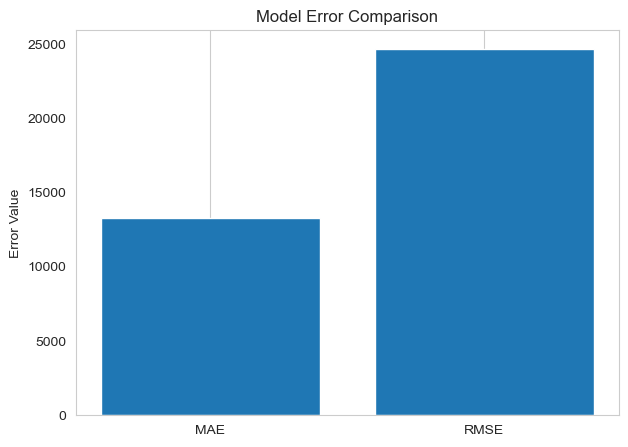

In [33]:
plt.figure(figsize=(7,5))
metrics = [mae, rmse]
labels = ["MAE", "RMSE"]
plt.bar(labels, metrics)
plt.title("Model Error Comparison")
plt.ylabel("Error Value")
plt.grid(axis='y')
plt.show()